In [77]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,AveragePooling2D

from math import e
from sklearn.model_selection import train_test_split

In [78]:
fogData = xr.open_dataset('../../../Data/FogData/CombinedFogData_25Stations.nc')
#plt.figure(figsize=[16,8])
StackFog=fogData.fogdata.stack(a=('years','months','days'))
StackFog
dd =[];
for i in range(StackFog.years.values.shape[0]):
    dd=dd+[str(StackFog.years[i].values)+'-'+str(StackFog.months[i].values)+"-"+str(StackFog.days[i].values)]
fg = xr.Dataset({'fogdata': (('time','stations'), StackFog.values.T)}, coords={'time': pd.to_datetime(dd),'stations': fogData.stations})
y=fg.fogdata.sum(dim='stations').sel(time=slice('1980-1-1','2014-12-31'))
y=y/25.0
#y

In [79]:
# Input Data
t2mData = xr.open_dataset('../../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5NH_t2m_daily_NovDecJan.nc')
d2mData = xr.open_dataset('../../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5NH_d2m_daily_NovDecJan.nc')

In [80]:
u10Data = xr.open_dataset('../../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5NH_u10_daily_NovDecJan.nc')
v10Data = xr.open_dataset('../../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5NH_v10_daily_NovDecJan.nc')

In [81]:
u10Data

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 46, longitude: 180, time: 3772)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T09:00:00 ... 2019-12-31T09:00:00
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 82.0 ... 6.0 4.0 2.0 0.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    u10        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.5 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Feb 04 11:46:14 2021: cdo daymean ERA5NH_u10_6hourly_No...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.5 (http://mpimet.mpg.de/...

In [82]:
rh = (e**((17.625*(d2mData.d2m.values-273.15))/(243.04+(d2mData.d2m.values-273.15)))/e**((17.625*(t2mData.t2m.values-273.15))/(243.04+(t2mData.t2m.values-273.15))))

rh_ds = xr.Dataset({'rh': (('time','latitude','longitude'), rh)}, coords={'time': t2mData.time,'latitude': t2mData.latitude,'longitude': t2mData.longitude})


In [83]:
t2m=t2mData.t2m.shift(time=1)
rh=rh_ds.rh.shift(time=1)

In [84]:
u10=u10Data.u10.shift(time=1)
v10=v10Data.v10.shift(time=1)

In [85]:
t2mTs=t2m[((t2m.time.dt.month>11) | (t2m.time.dt.month<2)) & (t2m.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'),latitude=slice(35,10),longitude=slice(60,100))

In [268]:
rhTs=rh[((rh.time.dt.month>11) | (rh.time.dt.month<2)) & (rh.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'),latitude=slice(40,0),longitude=slice(60,100))

In [269]:
u10Ts=u10[((u10.time.dt.month>11) | (u10.time.dt.month<2)) & (u10.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'),latitude=slice(35,10),longitude=slice(60,100))

In [270]:
v10Ts=u10[((v10.time.dt.month>11) | (v10.time.dt.month<2)) & (v10.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31'),latitude=slice(35,10),longitude=slice(60,100))

In [271]:
t2m_train, t2m_test, rh_train, rh_test,v10_train, v10_test,u10_train, u10_test,y_train,y_test = train_test_split( t2mTs, rhTs,v10Ts,u10Ts,y,test_size=0.20, random_state=0)

In [272]:
rhTs

<xarray.DataArray 'rh' (time: 2170, latitude: 21, longitude: 21)>
array([[[0.8871882 , 0.892714  , 0.88316935, ..., 0.5795072 ,
         0.5399976 , 0.60970414],
        [0.8433424 , 0.8242531 , 0.864324  , ..., 0.37850884,
         0.3749088 , 0.5412014 ],
        [0.72244984, 0.88401705, 0.8248934 , ..., 0.6115333 ,
         0.54800665, 0.6111406 ],
        ...,
        [0.86189854, 0.82313216, 0.8260577 , ..., 0.80606395,
         0.8347564 , 0.8251571 ],
        [0.82364297, 0.8165824 , 0.8394329 , ..., 0.7913775 ,
         0.7924115 , 0.8194505 ],
        [0.80852914, 0.8128043 , 0.8311512 , ..., 0.81393594,
         0.8102728 , 0.8861166 ]],

       [[0.9210557 , 0.9189385 , 0.88729376, ..., 0.68929666,
         0.59100604, 0.6278199 ],
        [0.9009643 , 0.8884307 , 0.95520556, ..., 0.57947254,
         0.51616335, 0.50291055],
        [0.78622276, 0.85153174, 0.78365535, ..., 0.40029025,
         0.48830813, 0.45736802],
...
        [0.75825286, 0.75663966, 0.7745335 , ..., 0.7379825 ,
         0.9185775 , 0.834525  ],
        [0.7861139 , 0.79873633, 0.78651863, ..., 0.7997985 ,
         0.79511577, 0.9523692 ],
        [0.79110426, 0.7897016 , 0.7666166 , ..., 0.79926705,
         0.7921895 , 0.8944727 ]],

       [[0.8474019 , 0.80069107, 0.7860304 , ..., 0.4512213 ,
         0.47080588, 0.48672435],
        [0.6856172 , 0.7021743 , 0.771818  , ..., 0.2855747 ,
         0.55316395, 0.4279993 ],
        [0.6433681 , 0.5631761 , 0.6174032 , ..., 0.43020418,
         0.3769541 , 0.16024944],
        ...,
        [0.8239711 , 0.774936  , 0.7589927 , ..., 0.7849464 ,
         0.87669605, 0.8041849 ],
        [0.8004936 , 0.7932504 , 0.76560605, ..., 0.8204147 ,
         0.7947611 , 0.8685698 ],
        [0.8000423 , 0.7728932 , 0.7723516 , ..., 0.81844324,
         0.82259095, 0.84881943]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T09:00:00 ... 2014-12-31T09:00:00
  * latitude   (latitude) float32 40.0 38.0 36.0 34.0 32.0 ... 6.0 4.0 2.0 0.0
  * longitude  (longitude) float32 60.0 62.0 64.0 66.0 ... 94.0 96.0 98.0 100.0

In [273]:
t2mtrain=t2m_train.values
t2mtrain=t2mtrain[:,:,:,None]
t2mtrain.shape
rhtrain=rh_train.values
rhtrain=rhtrain[:,:,:,None]
rhtrain.shape

u10train=u10_train.values
u10train=u10train[:,:,:,None]
u10train.shape

v10train=v10_train.values
v10train=v10train[:,:,:,None]
v10train.shape

(1736, 13, 21, 1)

In [274]:
ytrain=y_train.values
ytrain=ytrain[:,None]
ytrain.shape

(1736, 1)

In [275]:
t2mtest=t2m_test.values
t2mtest=t2mtest[:,:,:,None]
t2mtest.shape
rhtest=rh_test.values
rhtest=rhtest[:,:,:,None]
rhtest.shape
u10test=u10_test.values
u10test=u10test[:,:,:,None]
u10test.shape

v10test=v10_test.values
v10test=v10test[:,:,:,None]
v10test.shape

(434, 13, 21, 1)

In [276]:
ytest=y_test.values
ytest=ytest[:,None]
ytest.shape

(434, 1)

Epoch 1/3
55/55 [==============================] - 1s 16ms/step - loss: 0.4363 - val_loss: 0.1474
Epoch 2/3
55/55 [==============================] - 1s 13ms/step - loss: 0.1363 - val_loss: 0.1239
Epoch 3/3
55/55 [==============================] - 1s 13ms/step - loss: 0.1190 - val_loss: 0.1137


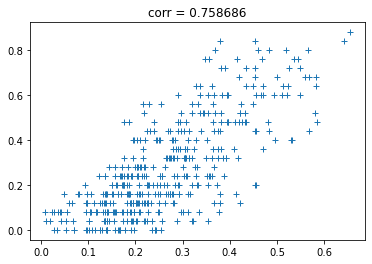

In [281]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,AveragePooling2D

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(rhtrain.shape[1],rhtrain.shape[2],1)))
#model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
#model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
#model.add(Conv2D(filters=3, kernel_size=(1, 1), activation='relu'))
#model.add(AveragePooling2D())

model.add(Flatten())

#model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation = 'linear'))

model.compile(optimizer='adam', loss='mae')

history = model.fit(rhtrain, ytrain, validation_data=(rhtest, ytest), epochs=3)
yy_test = model.predict(rhtest)

test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

plt.plot(yy_test,ytest,'+')
#y_test

In [100]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,AveragePooling2D

modelrh = Sequential()

modelrh.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(t2mtrain.shape[1],t2mtrain.shape[2],1)))
#model.add(MaxPooling2D())
modelrh = Dropout(0.25)(modelrh)
modelrh.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
modelrh = Dropout(0.25)(modelrh)
#model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
#model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
#model.add(Conv2D(filters=3, kernel_size=(1, 1), activation='relu'))
#model.add(AveragePooling2D())

modelrh.add(Flatten())

#model.add(Dense(units=100, activation='relu'))
#model.add(Dense(units=60, activation='relu'))
#model.add(Dense(units=40, activation='relu'))
modelrh.add(Dense(units=20, activation='relu'))

modelrh.add(Dense(units=1, activation = 'linear'))
modelrh.compile(optimizer='adam', loss='mae')

history = modelrh.fit(t2mtrain, ytrain, validation_data=(t2mtest, ytest), epochs=9)
yy_test = modelrh.predict(t2mtest)

test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

plt.plot(yy_test,ytest,'+')

ValueError: Attempt to convert a value (<tensorflow.python.keras.engine.sequential.Sequential object at 0x2b790e980bb0>) with an unsupported type (<class 'tensorflow.python.keras.engine.sequential.Sequential'>) to a Tensor.

Epoch 1/9
55/55 [==============================] - 1s 7ms/step - loss: 0.2037 - val_loss: 0.1610
Epoch 2/9
55/55 [==============================] - 0s 7ms/step - loss: 0.1653 - val_loss: 0.1540
Epoch 3/9
55/55 [==============================] - 0s 5ms/step - loss: 0.1372 - val_loss: 0.1463
Epoch 4/9
55/55 [==============================] - 0s 4ms/step - loss: 0.1300 - val_loss: 0.1453
Epoch 5/9
55/55 [==============================] - 0s 4ms/step - loss: 0.1171 - val_loss: 0.1380
Epoch 6/9
55/55 [==============================] - 0s 4ms/step - loss: 0.1170 - val_loss: 0.1310
Epoch 7/9
55/55 [==============================] - 0s 4ms/step - loss: 0.0992 - val_loss: 0.1536
Epoch 8/9
55/55 [==============================] - 0s 4ms/step - loss: 0.1000 - val_loss: 0.1251
Epoch 9/9
55/55 [==============================] - 0s 4ms/step - loss: 0.0870 - val_loss: 0.1341


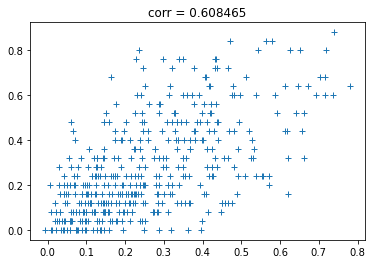

In [102]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,AveragePooling2D

model = Sequential()

model.add(Conv2D(filters=15, kernel_size=(3, 3), activation='relu', input_shape=(u10train.shape[1],u10train.shape[2],1)))
#model.add(AveragePooling2D())

model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu'))

model.add(Conv2D(filters=12, kernel_size=(2, 2), activation='relu'))
#model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=320, activation='relu'))
model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=1, activation = 'linear'))
model.compile(optimizer='adam', loss='mae')

history = model.fit(u10train, ytrain, validation_data=(u10test, ytest), epochs=9)
yy_test = model.predict(u10test)

test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

plt.plot(yy_test,ytest,'+')

Epoch 1/3
55/55 [==============================] - 1s 7ms/step - loss: 0.2012 - val_loss: 0.1732
Epoch 2/3
55/55 [==============================] - 0s 4ms/step - loss: 0.1675 - val_loss: 0.1462
Epoch 3/3
55/55 [==============================] - 0s 4ms/step - loss: 0.1413 - val_loss: 0.1468


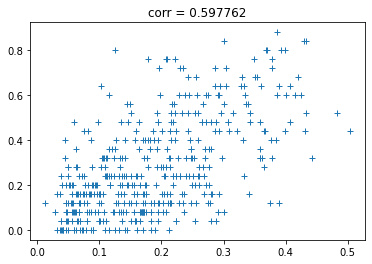

In [98]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation, concatenate

model = Sequential()

model.add(Conv2D(filters=15, kernel_size=(3, 3), activation='relu', input_shape=(v10train.shape[1],v10train.shape[2],1)))
#model.add(AveragePooling2D())

model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu'))

model.add(Conv2D(filters=12, kernel_size=(2, 2), activation='relu'))
#model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=320, activation='relu'))
model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=1, activation = 'linear'))
model.compile(optimizer='adam', loss='mae')

history = model.fit(v10train, ytrain, validation_data=(v10test, ytest), epochs=3)
yy_test = model.predict(v10test)

test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

plt.plot(yy_test,ytest,'+')

In [99]:
# Combine rh2m, t2m, u10, v10 

current_input = Input(shape=input_shape)
current_model = create_convolution_layers(u10train)

voltage_input = Input(shape=input_shape)
voltage_model = create_convolution_layers(rhtrain)

conv = concatenate([current_model, voltage_model])

conv = Flatten()(conv)

dense = Dense(512)(conv)
dense = LeakyReLU(alpha=0.1)(dense)
dense = Dropout(0.5)(dense)

output = Dense(num_classes, activation='softmax')(dense)

model = Model(inputs=[current_input, voltage_input], outputs=[output])

opt = optimizers.Adam()

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])